In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [28]:
mode = 1
mode_dict = {
    1: 'A431',
    2: 'all_but_A431',
    3: 'all'
}

run = '2023.05.09_CJ_cohort_and_celllines'


In [29]:
dscores = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/120523_drug_results_A431/drug_scores.tsv',
    # f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.05.09_CJ_cohort_and_celllines/drug_results_{mode_dict[mode]}/drug_scores.tsv',
    sep='\t')
dscores = dscores.loc[:, ~dscores.columns.str.contains('targets')].set_index('Drug').T

In [30]:
cell_line_data = pd.read_excel('/home/fhamood/Downloads/CHDM cell lines_EGFR signaling (1).xlsx')

In [31]:
cell_line_data

,Sample name,IL18 z score,EGFR z-score,EGFR Basket score,EGFR protein phosphorylation,EGFR kinase score,Batch,Channel,EGFR signaling++ (according to phosphoproteome analysis,EC50,Unnamed: 10
0,CHDM-U-CH2,2.666054,1.044831,3.510911,1.900833,-2.063934,16,1,no,> 1000,resistant
1,CHDM-JHC-7,2.490769,1.251437,5.817634,1.355271,-0.643636,15,7,no,> 1000,resistant
2,CHDM-UM-Chor5D,2.274870,1.477559,10.337046,2.875990,0.881031,16,4,(yes),> 1000,resistant
3,CHDM-U-CHCF359B,1.793561,1.089446,7.895566,0.712775,0.129590,15,4,no,> 1000,resistant
4,CHDM-CH-22,1.434643,2.718027,16.743390,5.213032,1.975397,15,1,yes,> 1000,resistant
5,CHDM-UM-Chor5C,0.747869,1.744227,14.618906,3.597696,2.250577,16,3,yes,> 1000,resistant
6,CHDM-U-CHCF365,3.929326,1.606071,15.317373,2.432079,4.111139,15,5,yes,5,NaN
7,CHDM-13425-306,3.045634,2.699208,11.385088,7.059096,0.134124,16,5,(yes),3,NaN
8,CHDM-U-CH17PII,2.261456,1.556650,9.143372,2.571928,1.454822,15,3,(yes),11,NaN
9,CHDM-U-CH1,2.027920,1.538684,13.991640,1.092615,3.755958,15,2,(yes),33,NaN


In [32]:
cell_line_data = cell_line_data[['Sample  name', 'EC50', 'Unnamed: 10', 'EGFR Basket score']]
cell_line_data['EC50'] = cell_line_data['EC50'].replace('> 1000', 1000).replace('n.d.', 9999).astype(int)
cell_line_data = cell_line_data.rename(columns={'Unnamed: 10': 'Viability'})
cell_line_data['Viability'] = cell_line_data['Viability'].replace('resistant', 'res').replace(np.NaN, 'susc').astype(
    str)
cell_line_data

/tmp/ipykernel_30940/3674828825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_line_data['EC50'] = cell_line_data['EC50'].replace('> 1000', 1000).replace('n.d.', 9999).astype(int)


,Sample name,EC50,Viability,EGFR Basket score
0,CHDM-U-CH2,1000,res,3.510911
1,CHDM-JHC-7,1000,res,5.817634
2,CHDM-UM-Chor5D,1000,res,10.337046
3,CHDM-U-CHCF359B,1000,res,7.895566
4,CHDM-CH-22,1000,res,16.743390
5,CHDM-UM-Chor5C,1000,res,14.618906
6,CHDM-U-CHCF365,5,susc,15.317373
7,CHDM-13425-306,3,susc,11.385088
8,CHDM-U-CH17PII,11,susc,9.143372
9,CHDM-U-CH1,33,susc,13.991640


In [33]:
afatinib_score = dscores[['Afatinib']]
afatinib_score = afatinib_score.rename(columns={'Afatinib': 'Afatinib_score'})

cell_line_data = pd.merge(left=cell_line_data, right=afatinib_score, left_on='Sample  name', right_index=True,
                          how='left')
cell_line_data

,Sample name,EC50,Viability,EGFR Basket score,Afatinib_score
0,CHDM-U-CH2,1000,res,3.510911,1.026236
1,CHDM-JHC-7,1000,res,5.817634,1.337844
2,CHDM-UM-Chor5D,1000,res,10.337046,0.931165
3,CHDM-U-CHCF359B,1000,res,7.895566,0.507730
4,CHDM-CH-22,1000,res,16.743390,1.045480
5,CHDM-UM-Chor5C,1000,res,14.618906,1.441289
6,CHDM-U-CHCF365,5,susc,15.317373,1.402331
7,CHDM-13425-306,3,susc,11.385088,1.476213
8,CHDM-U-CH17PII,11,susc,9.143372,1.455524
9,CHDM-U-CH1,33,susc,13.991640,1.382765


In [34]:
# allcells = ['CHDM-MUG-CC1.1',
#             'CHDM-UM-Chor1',
#             'CHDM-MUG-CC1',
#             'CHDM-U-CH12',
#             'CHDM-UM-Chor5C',
#             'CHDM-U-CHCF365',
#             'CHDM-U-CH17PII',
#             'CHDM-U-CH1',
#             'CHDM-13425-306',
#             'CHDM-UM-Chor6',
#             'CHDM-MUG-Chor1',
#             'CHDM-JHC-7',
#             'CHDM-U-CH2',
#             'CHDM-UM-Chor5D',
#             'CHDM-CH-22',
#             'CHDM-U-CHCF359B']
#
# cells = allcells.copy()
# cells.remove('CHDM-UM-Chor6')
#
# vals = [1.903701,
#         1.852159,
#         1.742318,
#         1.724248,
#         1.452443,
#         1.422098,
#         1.421860,
#         1.385450,
#         1.376062,
#         1.363161,
#         1.257663,
#         1.165380,
#         0.978356,
#         0.953341,
#         0.891708,
#         0.593918]
# mini = pd.DataFrame({'Sample  name': allcells, 'Afatinib_score_manual': vals})
#
# mgd = pd.merge(left=cell_line_data, right=mini, on='Sample  name', how='left')
# mgd

In [38]:
uncapped_dscores = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_A431_noclip/drug_scores.tsv',
    sep='\t')

uncapped_dscores = uncapped_dscores.loc[:, ~uncapped_dscores.columns.str.contains('targets')].set_index('Drug').T

uncapped_afatinib_score = uncapped_dscores[['Afatinib']]
uncapped_afatinib_score = uncapped_afatinib_score.rename(columns={'Afatinib': 'Afatinib_score_nocap'})

uncapped_cell_line_data = pd.merge(left=cell_line_data, right=uncapped_afatinib_score, left_on='Sample  name',
                                   right_index=True,
                                   how='left')
uncapped_cell_line_data.loc[uncapped_cell_line_data['Sample  name'] == 'CHDM-UM-Chor6', 'Viability'] = 'unknown'
uncapped_cell_line_data = uncapped_cell_line_data.sort_values(by='EC50')
uncapped_cell_line_data = uncapped_cell_line_data.rename(columns={'Sample  name': 'Sample_name'}).reset_index(drop=True)
uncapped_cell_line_data


,Sample_name,EC50,Viability,EGFR Basket score,Afatinib_score,Afatinib_score_nocap
0,CHDM-13425-306,3,susc,11.385088,1.476213,0.811190
1,CHDM-U-CHCF365,5,susc,15.317373,1.402331,1.769309
2,CHDM-MUG-Chor1,8,susc,5.215621,1.375894,0.870549
3,CHDM-U-CH17PII,11,susc,9.143372,1.455524,1.661242
4,CHDM-MUG-CC1.1,14,susc,8.520245,1.921285,2.085006
5,CHDM-MUG-CC1,14,susc,6.325893,1.720292,2.145330
6,CHDM-UM-Chor1,23,susc,14.435507,1.874683,2.181037
7,CHDM-U-CH12,27,susc,16.128540,1.688724,1.849500
8,CHDM-U-CH1,33,susc,13.991640,1.382765,1.783997
9,CHDM-U-CH2,1000,res,3.510911,1.026236,1.050054


In [41]:
capped_dscores = pd.read_csv(
    # f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_A431_clipped/drug_scores.tsv',
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_all_but_A431_clipped/drug_scores.tsv',
    # f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_all_clipped/drug_scores.tsv',
    sep='\t')

capped_dscores = capped_dscores.loc[:, ~capped_dscores.columns.str.contains('targets')].set_index('Drug').T

capped_afatinib_score = capped_dscores[['Afatinib']]
capped_afatinib_score = capped_afatinib_score.rename(columns={'Afatinib': 'Afatinib_score_capped'})

capped_cell_line_data = pd.merge(left=uncapped_cell_line_data, right=capped_afatinib_score, left_on='Sample_name',
                                 right_index=True,
                                 how='left')
capped_cell_line_data.loc[capped_cell_line_data['Sample_name'] == 'CHDM-UM-Chor6', 'Viability'] = 'unknown'
capped_cell_line_data = capped_cell_line_data.sort_values(by='EC50')
capped_cell_line_data = capped_cell_line_data.reset_index(drop=True)
capped_cell_line_data


,Sample_name,EC50,Viability,EGFR Basket score,Afatinib_score,Afatinib_score_nocap,Afatinib_score_capped
0,CHDM-13425-306,3,susc,11.385088,1.476213,0.811190,0.946148
1,CHDM-U-CHCF365,5,susc,15.317373,1.402331,1.769309,0.556855
2,CHDM-MUG-Chor1,8,susc,5.215621,1.375894,0.870549,1.105792
3,CHDM-U-CH17PII,11,susc,9.143372,1.455524,1.661242,0.958684
4,CHDM-MUG-CC1.1,14,susc,8.520245,1.921285,2.085006,0.665220
5,CHDM-MUG-CC1,14,susc,6.325893,1.720292,2.145330,0.950843
6,CHDM-UM-Chor1,23,susc,14.435507,1.874683,2.181037,1.549949
7,CHDM-U-CH12,27,susc,16.128540,1.688724,1.849500,0.364282
8,CHDM-U-CH1,33,susc,13.991640,1.382765,1.783997,0.987666
9,CHDM-U-CH2,1000,res,3.510911,1.026236,1.050054,0.915119


In [43]:
capped_cell_line_data[['Sample_name', 'EC50', 'Viability', 'EGFR Basket score', 'Afatinib_score_capped']].rename(
    columns={'Afatinib_score_capped': 'Afatinib_TOPAS_noA431'})

,Sample_name,EC50,Viability,EGFR Basket score,Afatinib_TOPAS_noA431
0,CHDM-13425-306,3,susc,11.385088,0.946148
1,CHDM-U-CHCF365,5,susc,15.317373,0.556855
2,CHDM-MUG-Chor1,8,susc,5.215621,1.105792
3,CHDM-U-CH17PII,11,susc,9.143372,0.958684
4,CHDM-MUG-CC1.1,14,susc,8.520245,0.665220
5,CHDM-MUG-CC1,14,susc,6.325893,0.950843
6,CHDM-UM-Chor1,23,susc,14.435507,1.549949
7,CHDM-U-CH12,27,susc,16.128540,0.364282
8,CHDM-U-CH1,33,susc,13.991640,0.987666
9,CHDM-U-CH2,1000,res,3.510911,0.915119


In [62]:
capped_cell_line_data.drop(columns=['Afatinib_score_nocap', 'Afatinib_score']).rename(
    columns={'Afatinib_score_capped': 'Afatinib_noA431'})

,Sample_name,EC50,Viability,EGFR Basket score,Afatinib_noA431
0,CHDM-13425-306,3,susc,11.385088,0.946148
1,CHDM-U-CHCF365,5,susc,15.317373,0.556855
2,CHDM-MUG-Chor1,8,susc,5.215621,1.105792
3,CHDM-U-CH17PII,11,susc,9.143372,0.958684
4,CHDM-MUG-CC1.1,14,susc,8.520245,0.665220
5,CHDM-MUG-CC1,14,susc,6.325893,0.950843
6,CHDM-UM-Chor1,23,susc,14.435507,1.549949
7,CHDM-U-CH12,27,susc,16.128540,0.364282
8,CHDM-U-CH1,33,susc,13.991640,0.987666
9,CHDM-U-CH2,1000,res,3.510911,0.915119


### All variations of the score + manual score for the 16 cell lines; added spearman correlation

In [63]:
summary_df = pd.DataFrame()

In [64]:
name = 'Afatinib_old'

a431_1205 = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/120523_drug_results_A431/drug_scores.tsv',
    sep='\t')
a431_1205 = a431_1205.loc[:, ~a431_1205.columns.str.contains('targets')].set_index('Drug').T[['Afatinib']]
a431_1205 = a431_1205.loc[a431_1205.index.isin(cells)]

temp = pd.merge(left=cell_line_data, right=a431_1205.rename(columns={"Afatinib": name}), right_index=True,
                left_on='Sample_name', how='right')
summary_df[name] = temp[name]
stats.spearmanr(temp['EC50'], temp[name])

KeyError: 'Sample_name'

In [ ]:
name = 'Afatinib_A431_clipped'

a431_1206 = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_A431_clipped/drug_scores.tsv',
    sep='\t')
a431_1206 = a431_1206.loc[:, ~a431_1206.columns.str.contains('targets')].set_index('Drug').T[['Afatinib']]
a431_1206 = a431_1206.loc[a431_1206.index.isin(cells)]

temp = pd.merge(left=capped_cell_line_data.drop(columns=['Afatinib_score_capped', 'Afatinib_score_nocap']),
                right=a431_1206.rename(columns={"Afatinib": name}), right_index=True, left_on='Sample_name',
                how='right')
summary_df[name] = temp[name]
stats.spearmanr(temp['Afatinib_score'], temp[name])

In [65]:
name = 'Afatinib_A431_noclip'

a431_1206_noclip = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_A431_noclip/drug_scores.tsv',
    sep='\t')
a431_1206_noclip = a431_1206_noclip.loc[:, ~a431_1206_noclip.columns.str.contains('targets')].set_index('Drug').T[
    ['Afatinib']]
a431_1206_noclip = a431_1206_noclip.loc[a431_1206_noclip.index.isin(cells)]

temp = pd.merge(left=capped_cell_line_data.drop(columns=['Afatinib_score_capped', 'Afatinib_score_nocap']),
                right=a431_1206_noclip.rename(columns={"Afatinib": name}), right_index=True, left_on='Sample_name',
                how='right')
summary_df[name] = temp[name]
stats.spearmanr(temp['Afatinib_score'], temp[name])

SignificanceResult(statistic=0.7749999999999999, pvalue=0.0006896453939514363)

In [66]:
name = 'Afatinib_noA431_noclip'

all_but_a431_1206_noclip = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_all_but_A431_noclip/drug_scores.tsv',
    sep='\t')
all_but_a431_1206_noclip = \
    all_but_a431_1206_noclip.loc[:, ~all_but_a431_1206_noclip.columns.str.contains('targets')].set_index('Drug').T[
        ['Afatinib']]
all_but_a431_1206_noclip = all_but_a431_1206_noclip.loc[all_but_a431_1206_noclip.index.isin(cells)]

temp = pd.merge(left=capped_cell_line_data.drop(columns=['Afatinib_score_capped', 'Afatinib_score_nocap']),
                right=all_but_a431_1206_noclip.rename(columns={"Afatinib": name}), right_index=True,
                left_on='Sample_name', how='right')
summary_df[name] = temp[name]
stats.spearmanr(temp['Afatinib_score'], temp[name])

SignificanceResult(statistic=0.017857142857142853, pvalue=0.9496353041738621)

In [67]:
name = 'Afatinib_noA431_clipped'

all_but_a431_1206_clipped = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_all_but_A431_clipped/drug_scores.tsv',
    sep='\t')
all_but_a431_1206_clipped = \
    all_but_a431_1206_clipped.loc[:, ~all_but_a431_1206_clipped.columns.str.contains('targets')].set_index('Drug').T[
        ['Afatinib']]
all_but_a431_1206_clipped = all_but_a431_1206_clipped.loc[all_but_a431_1206_clipped.index.isin(cells)]

temp = pd.merge(left=capped_cell_line_data.drop(columns=['Afatinib_score_capped', 'Afatinib_score_nocap']),
                right=all_but_a431_1206_clipped.rename(columns={"Afatinib": name}), right_index=True,
                left_on='Sample_name', how='right')
summary_df[name] = temp[name]
stats.spearmanr(temp['Afatinib_score'], temp[name])

SignificanceResult(statistic=0.07857142857142857, pvalue=0.7807545523090466)

In [68]:
name = 'Afatinib_all_noclip'

all_1206_noclip = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_all_noclip/drug_scores.tsv',
    sep='\t')
all_1206_noclip = all_1206_noclip.loc[:, ~all_1206_noclip.columns.str.contains('targets')].set_index('Drug').T[
    ['Afatinib']]
all_1206_noclip = all_1206_noclip.loc[all_1206_noclip.index.isin(cells)]

temp = pd.merge(left=capped_cell_line_data.drop(columns=['Afatinib_score_capped', 'Afatinib_score_nocap']),
                right=all_1206_noclip.rename(columns={"Afatinib": name}), right_index=True, left_on='Sample_name',
                how='right')
summary_df[name] = temp[name]
stats.spearmanr(temp['Afatinib_score'], temp[name])

SignificanceResult(statistic=0.7571428571428571, pvalue=0.0010811081941858346)

In [69]:
name = 'Afatinib_all_clipped'

all_1206_clipped = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_all_clipped/drug_scores.tsv',
    sep='\t')
all_1206_clipped = all_1206_clipped.loc[:, ~all_1206_clipped.columns.str.contains('targets')].set_index('Drug').T[
    ['Afatinib']]
all_1206_clipped = all_1206_clipped.loc[all_1206_clipped.index.isin(cells)]

temp = pd.merge(left=capped_cell_line_data.drop(columns=['Afatinib_score_capped', 'Afatinib_score_nocap']),
                right=all_1206_clipped.rename(columns={"Afatinib": name}), right_index=True, left_on='Sample_name',
                how='right')
summary_df[name] = temp[name]
stats.spearmanr(temp['Afatinib_score'], temp[name])

SignificanceResult(statistic=0.7607142857142856, pvalue=0.0009911286119823719)

In [74]:
summary_df

,Afatinib_A431_noclip,Afatinib_noA431_noclip,Afatinib_noA431_clipped,Afatinib_all_noclip,Afatinib_all_clipped
13,1.252567,1.425342,1.378326,1.348465,1.343819
8,1.783997,0.885042,0.987666,1.695374,1.786289
3,1.661242,0.855351,0.958684,1.623061,1.727129
12,0.703713,-0.631485,-0.711513,0.495160,0.592028
1,1.769309,0.470278,0.556855,1.663016,1.714884
6,2.181037,1.427816,1.549949,2.198299,2.316506
10,1.457277,1.643302,1.664215,1.635318,1.626122
5,2.145330,1.008755,0.950843,2.092114,2.103452
9,1.050054,0.958286,0.915119,1.139749,1.184449
7,1.849500,0.377062,0.364282,1.738372,1.795271


### TODO: Make ROC curves for all 3x2 combinations

In [70]:
summary = pd.merge(left=capped_cell_line_data[['Sample_name', 'EC50', 'Viability']], right=summary_df, left_index=True,
                   right_index=True, how='right')
summary['susceptible'] = summary['Viability'].map({'res': False, 'susc': True})
summary

,Sample_name,EC50,Viability,Afatinib_A431_noclip,Afatinib_noA431_noclip,Afatinib_noA431_clipped,Afatinib_all_noclip,Afatinib_all_clipped,susceptible
13,CHDM-CH-22,1000,res,1.252567,1.425342,1.378326,1.348465,1.343819,False
8,CHDM-U-CH1,33,susc,1.783997,0.885042,0.987666,1.695374,1.786289,True
3,CHDM-U-CH17PII,11,susc,1.661242,0.855351,0.958684,1.623061,1.727129,True
12,CHDM-U-CHCF359B,1000,res,0.703713,-0.631485,-0.711513,0.495160,0.592028,False
1,CHDM-U-CHCF365,5,susc,1.769309,0.470278,0.556855,1.663016,1.714884,True
6,CHDM-UM-Chor1,23,susc,2.181037,1.427816,1.549949,2.198299,2.316506,True
10,CHDM-JHC-7,1000,res,1.457277,1.643302,1.664215,1.635318,1.626122,False
5,CHDM-MUG-CC1,14,susc,2.145330,1.008755,0.950843,2.092114,2.103452,True
9,CHDM-U-CH2,1000,res,1.050054,0.958286,0.915119,1.139749,1.184449,False
7,CHDM-U-CH12,27,susc,1.849500,0.377062,0.364282,1.738372,1.795271,True


thresholds: [3.19829904 2.19829904 1.66301572 1.63531752 1.62306128 1.13974935
 1.00624872 0.49515983]
fpr: [0.         0.         0.         0.16666667 0.16666667 0.66666667
 0.66666667 1.        ]
tpr: [0.         0.11111111 0.66666667 0.66666667 0.77777778 0.77777778
 1.         1.        ]


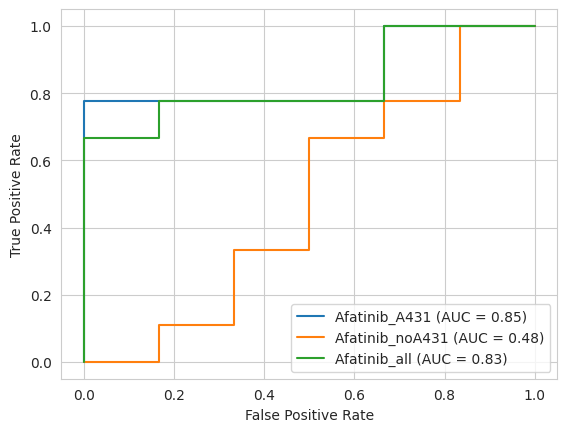

In [73]:
import sklearn.metrics as metrics

fig, ax = plt.subplots()

summary = summary.rename(columns={i: i.replace('_noclip', '') for i in
                                  ['Afatinib_A431_noclip', 'Afatinib_noA431_noclip', 'Afatinib_all_noclip']})

# for group in ['Afatinib_A431_noclip']:
for group in ['Afatinib_A431', 'Afatinib_noA431', 'Afatinib_all']:
    fpr, tpr, thresholds = metrics.roc_curve(summary['susceptible'], summary[group])
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=group)
    display.plot(ax=ax, name=group)

print(f'thresholds: {thresholds}')
print(f'fpr: {fpr}')
print(f'tpr: {tpr}')

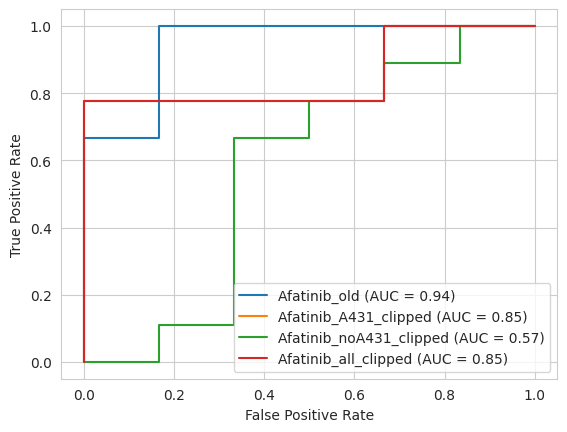

In [210]:
fig, ax = plt.subplots()

for group in ['Afatinib_old', 'Afatinib_A431_clipped', 'Afatinib_noA431_clipped', 'Afatinib_all_clipped']:
    fpr, tpr, thresholds = metrics.roc_curve(summary['susceptible'], summary[group])
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=group)
    display.plot(ax=ax, name=group)


In [216]:
uncapped_cell_line_data
sum2 = pd.merge(left=uncapped_cell_line_data[['Sample_name', 'EGFR Basket score']], right=summary, on='Sample_name')

thresholds: [17.74339026 16.74339026 15.31737254 14.61890572 11.38508813 10.33704619
  8.52024536  7.89556598  6.32589277  5.81763396  5.21562135  3.51091104]
fpr: [0.         0.16666667 0.16666667 0.33333333 0.33333333 0.5
 0.5        0.66666667 0.66666667 0.83333333 0.83333333 1.        ]
tpr: [0.         0.         0.22222222 0.22222222 0.55555556 0.55555556
 0.77777778 0.77777778 0.88888889 0.88888889 1.         1.        ]


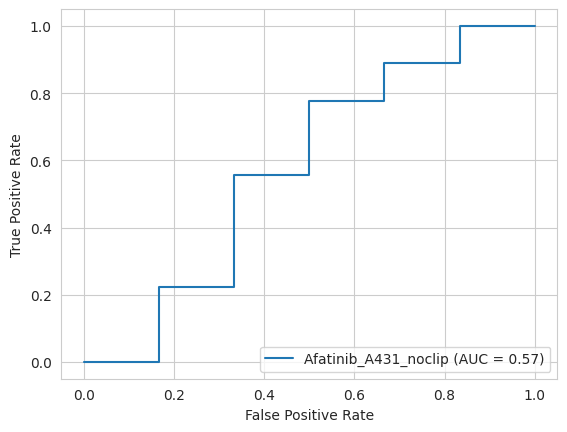

In [221]:
fpr, tpr, thresholds = metrics.roc_curve(sum2['susceptible'], sum2['EGFR Basket score'])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=group)
display.plot()

print(f'thresholds: {thresholds}')
print(f'fpr: {fpr}')
print(f'tpr: {tpr}')

In [262]:
afatinib_new = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/{run}/230612_drug_results_A431_clipped/drug_scores.tsv',
    sep='\t')
afatinib_new = afatinib_new.loc[:, ~afatinib_new.columns.str.contains('targets')].set_index('Drug').T
afatinib_new = afatinib_new.loc[~afatinib_new.index.isin(['stdev', 'mean'])]

<AxesSubplot: xlabel='Lapatinib'>

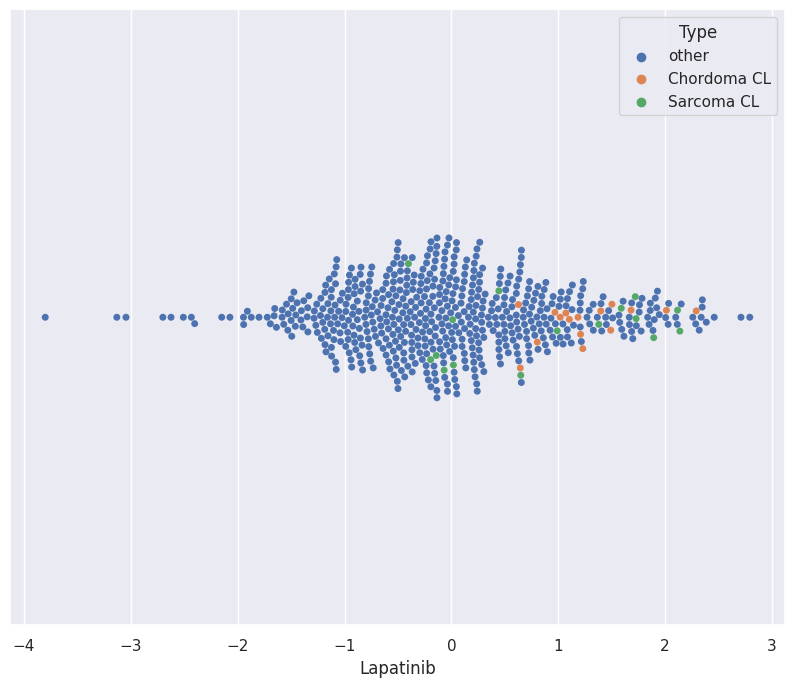

In [269]:
drug = 'Lapatinib'

afatinib_score_plot = afatinib_new.copy()
afatinib_score_plot['Type'] = 'other'
afatinib_score_plot.loc[afatinib_score_plot.index.str.startswith('CHDM'), 'Type'] = 'Chordoma CL'
afatinib_score_plot.loc[afatinib_score_plot.index.str.startswith('SRCM'), 'Type'] = 'Sarcoma CL'

sns.set(rc={'figure.figsize': (10, 8)})
sns.swarmplot(data=afatinib_score_plot, x=drug, hue='Type')

<AxesSubplot: xlabel='Drug'>

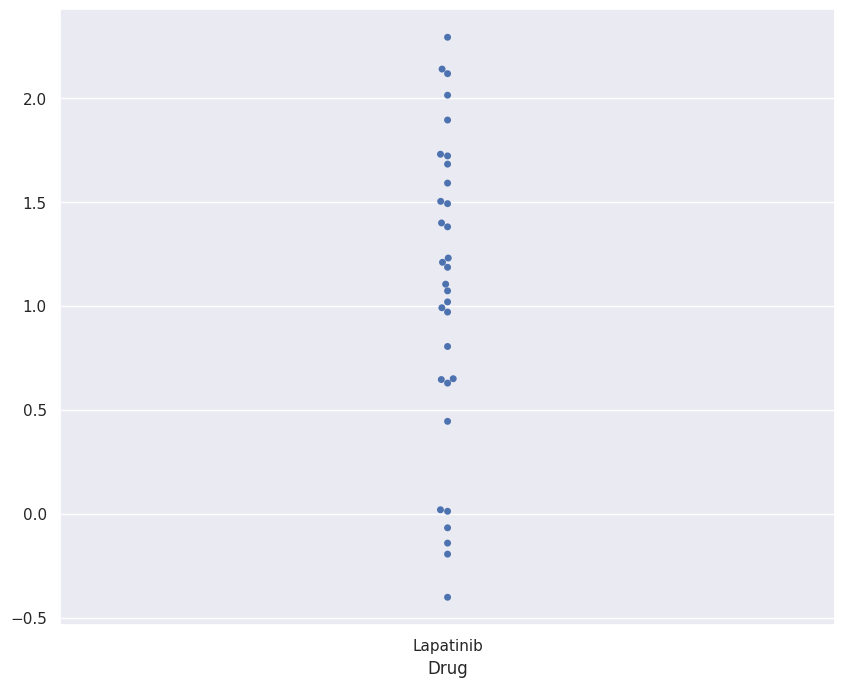

In [270]:
sns.swarmplot(afatinib_score_plot.loc[(afatinib_score_plot.index.str.startswith('CHDM')) | (
    afatinib_score_plot.index.str.startswith('SRCM'))][[drug]])
# pd.merge(left=afatinib_score_plot.loc[(afatinib_score_plot.index.str.startswith('SRCM'))][['Afatinib_score']], right=pd.read_excel('/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/SOLID_TUMORS_Metadata_230523_CJ_w_celllines_AS 230612.xlsx')[['Sample name', 'Batch_No']], right_on='Sample name', left_index=True, how='left')
# afatinib_score_plot[[drug]]

## New run processing

Columns:
['Drug',
'Modified sequence',
'weight_CHDM-CH-22',
'weight_CHDM-U-CH1',
'weight_CHDM-U-CH17PII',
'weight_CHDM-U-CHCF359B',
'weight_CHDM-U-CHCF365',
'weight_CHDM-UM-Chor1',
'weight_CHDM-JHC-7',
'weight_CHDM-MUG-CC1',
'weight_CHDM-U-CH2',
'weight_CHDM-U-CH12',
'weight_CHDM-UM-Chor5C',
'weight_CHDM-UM-Chor5D',
'weight_CHDM-13425-306',
'weight_CHDM-MUG-CC1.1',
'weight_CHDM-MUG-Chor1',
'weight_CHDM-UM-Chor6',
'weight_CHDM-MUG-CC1-R2',
'pat_CHDM-CH-22',
'pat_CHDM-U-CH1',
'pat_CHDM-U-CH17PII',
'pat_CHDM-U-CHCF359B',
'pat_CHDM-U-CHCF365',
'pat_CHDM-UM-Chor1',
'pat_CHDM-JHC-7',
'pat_CHDM-MUG-CC1',
'pat_CHDM-U-CH2',
'pat_CHDM-U-CH12',
'pat_CHDM-UM-Chor5C',
'pat_CHDM-UM-Chor5D',
'pat_CHDM-13425-306',
'pat_CHDM-MUG-CC1.1',
'pat_CHDM-MUG-Chor1',
'pat_CHDM-UM-Chor6',
'pat_CHDM-MUG-CC1-R2',
'weighted_CHDM-CH-22',
'weighted_CHDM-U-CH1',
'weighted_CHDM-U-CH17PII',
'weighted_CHDM-U-CHCF359B',
'weighted_CHDM-U-CHCF365',
'weighted_CHDM-UM-Chor1',
'weighted_CHDM-JHC-7',
'weighted_CHDM-MUG-CC1',
'weighted_CHDM-U-CH2',
'weighted_CHDM-U-CH12',
'weighted_CHDM-UM-Chor5C',
'weighted_CHDM-UM-Chor5D',
'weighted_CHDM-13425-306',
'weighted_CHDM-MUG-CC1.1',
'weighted_CHDM-MUG-Chor1',
'weighted_CHDM-UM-Chor6',
'weighted_CHDM-MUG-CC1-R2']

In [3]:
run = '2023.06.12_CJ_batch111_mixed'

dscores = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.12_CJ_batch111_mixed/230615_drug_results_all_clipped/drug_scores.tsv',
    sep='\t')
dscores = dscores.loc[:, ~dscores.columns.str.contains('targets')].set_index('Drug').T
dscores = dscores.loc[~dscores.index.isin(['stdev', 'mean'])]
dscores.loc[dscores.index.str.startswith('CHDM'), ['Afatinib']]


Drug,Afatinib
CHDM-CH-22,1.261092
CHDM-U-CH1,1.718658
CHDM-U-CH17PII,1.704063
CHDM-U-CHCF359B,0.560623
CHDM-U-CHCF365,1.670333
CHDM-UM-Chor1,2.248128
CHDM-JHC-7,1.592700
CHDM-MUG-CC1,2.048862
CHDM-U-CH2,1.101103
CHDM-U-CH12,1.693754


In [27]:
len(dscores.columns)

133

In [4]:
pepcols = ['Drug', 'Modified sequence', 'weight_CHDM-CH-22', 'weight_CHDM-U-CH1', 'weight_CHDM-U-CH17PII',
           'weight_CHDM-U-CHCF359B', 'weight_CHDM-U-CHCF365', 'weight_CHDM-UM-Chor1', 'weight_CHDM-JHC-7',
           'weight_CHDM-MUG-CC1', 'weight_CHDM-U-CH2', 'weight_CHDM-U-CH12', 'weight_CHDM-UM-Chor5C',
           'weight_CHDM-UM-Chor5D', 'weight_CHDM-13425-306', 'weight_CHDM-MUG-CC1.1', 'weight_CHDM-MUG-Chor1',
           'weight_CHDM-UM-Chor6', 'weight_CHDM-MUG-CC1-R2', 'pat_CHDM-CH-22', 'pat_CHDM-U-CH1', 'pat_CHDM-U-CH17PII',
           'pat_CHDM-U-CHCF359B', 'pat_CHDM-U-CHCF365', 'pat_CHDM-UM-Chor1', 'pat_CHDM-JHC-7', 'pat_CHDM-MUG-CC1',
           'pat_CHDM-U-CH2', 'pat_CHDM-U-CH12', 'pat_CHDM-UM-Chor5C', 'pat_CHDM-UM-Chor5D', 'pat_CHDM-13425-306',
           'pat_CHDM-MUG-CC1.1', 'pat_CHDM-MUG-Chor1', 'pat_CHDM-UM-Chor6', 'pat_CHDM-MUG-CC1-R2',
           'weighted_CHDM-CH-22', 'weighted_CHDM-U-CH1', 'weighted_CHDM-U-CH17PII', 'weighted_CHDM-U-CHCF359B',
           'weighted_CHDM-U-CHCF365', 'weighted_CHDM-UM-Chor1', 'weighted_CHDM-JHC-7', 'weighted_CHDM-MUG-CC1',
           'weighted_CHDM-U-CH2', 'weighted_CHDM-U-CH12', 'weighted_CHDM-UM-Chor5C', 'weighted_CHDM-UM-Chor5D',
           'weighted_CHDM-13425-306', 'weighted_CHDM-MUG-CC1.1', 'weighted_CHDM-MUG-Chor1', 'weighted_CHDM-UM-Chor6',
           'weighted_CHDM-MUG-CC1-R2']

peptides = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.12_CJ_batch111_mixed/230615_drug_results_all_clipped/scored_peptides.tsv',
    sep='\t', usecols=pepcols)

In [5]:
peptides

,Drug,Modified sequence,weight_CHDM-CH-22,weight_CHDM-U-CH1,weight_CHDM-U-CH17PII,weight_CHDM-U-CHCF359B,weight_CHDM-U-CHCF365,weight_CHDM-UM-Chor1,weight_CHDM-JHC-7,weight_CHDM-MUG-CC1,...,weighted_CHDM-MUG-CC1,weighted_CHDM-U-CH2,weighted_CHDM-U-CH12,weighted_CHDM-UM-Chor5C,weighted_CHDM-UM-Chor5D,weighted_CHDM-13425-306,weighted_CHDM-MUG-CC1.1,weighted_CHDM-MUG-Chor1,weighted_CHDM-UM-Chor6,weighted_CHDM-MUG-CC1-R2
0,AZD0156,_(Acetyl (Protein N-term))M(Oxidation (M))DLAA...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AZD0156,_(Acetyl (Protein N-term))M(Oxidation (M))DLAA...,0.369352,0.369352,0.369352,0.369352,0.369352,0.369352,0.369352,0.369352,...,0.194337,-0.108970,-0.131509,-0.077862,0.022782,-0.106138,0.061476,-0.160858,-0.036243,NaN
2,AZD0156,_(Acetyl (Protein N-term))M(Oxidation (M))SETA...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZD0156,_(Acetyl (Protein N-term))M(Oxidation (M))SETA...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZD0156,_(Acetyl (Protein N-term))M(Oxidation (M))SETA...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167704,Zanubrutinib,_pSYEDM(Oxidation (M))IGEEVPSDQYYWAPLAQHER_,0.186521,0.186521,0.186521,0.186521,0.186521,0.186521,0.186521,0.186521,...,0.218121,0.007298,0.089428,0.127664,0.090447,0.118984,0.229843,0.021812,0.032239,0.130185
167705,Zanubrutinib,_pSYEDMIGEEVPSDQYYWAPLAQHER_,0.222591,0.222591,0.222591,0.222591,0.222591,0.222591,0.222591,0.222591,...,0.280805,0.259711,0.363986,0.377838,0.356559,0.381640,0.521027,0.226963,0.262218,0.349367
167706,Zanubrutinib,_pTPEGISEEQR_,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.273250,0.948268,-0.532007,-1.889394,-0.800432,2.510170,-0.767666,-0.345603,0.638200,-0.628150
167707,Zanubrutinib,_pTTSFAESCKPVQQPSAFGSM(Oxidation (M))K_,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
annotated_peptides = pd.read_csv(
    f'/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.12_CJ_batch111_mixed/230615_drug_results_all_clipped/drug_annotated_patients_with_weights.tsv',
    sep='\t')
annotated_peptides = annotated_peptides.loc[annotated_peptides['Drug'] == 'Afatinib'][
    ['Modified sequence', 'Drug', 'Gene names', 'PSP Kinases']].drop_duplicates(keep='first')
peptides = pd.merge(left=annotated_peptides, right=peptides, on=['Modified sequence', 'Drug'], how='outer',
                    validate='one_to_one')

/tmp/ipykernel_30940/1545081482.py:1: DtypeWarning: Columns (1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523

In [21]:
peptides = peptides.loc[peptides['Drug'] == 'Afatinib']

In [22]:
patvals = peptides.columns[peptides.columns.str.startswith('pat_')].tolist()
peptides = peptides.loc[~peptides[patvals].isna().all(axis=1)]

In [23]:
patbatch_peptides = set(peptides.loc[~peptides['pat_CHDM-MUG-CC1-R2'].isna()]['Modified sequence'].tolist())
linebatch_peptides = set(peptides.loc[~peptides[['pat_CHDM-CH-22', 'pat_CHDM-U-CH1', 'pat_CHDM-U-CH17PII',
                                                 'pat_CHDM-U-CHCF359B', 'pat_CHDM-U-CHCF365', 'pat_CHDM-UM-Chor1',
                                                 'pat_CHDM-JHC-7', 'pat_CHDM-MUG-CC1',
                                                 'pat_CHDM-U-CH2', 'pat_CHDM-U-CH12', 'pat_CHDM-UM-Chor5C',
                                                 'pat_CHDM-UM-Chor5D', 'pat_CHDM-13425-306',
                                                 'pat_CHDM-MUG-CC1.1', 'pat_CHDM-MUG-Chor1',
                                                 'pat_CHDM-UM-Chor6']].isna().all(axis=1)][
                             'Modified sequence'].tolist())

Text(0.5, 1.0, 'Observed Afatinib target peptides')

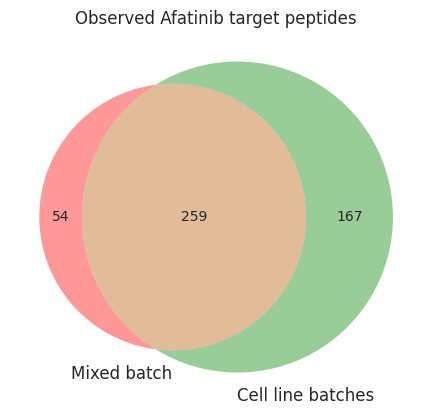

In [46]:
from matplotlib_venn import venn2

venn2([patbatch_peptides, linebatch_peptides], set_labels=['Mixed batch', 'Cell line batches'])
plt.title('Observed Afatinib target peptides')

In [78]:
chdm_scores = dscores.loc[dscores.index.str.startswith('CHDM')]
srcm_scores = dscores.loc[dscores.index.str.startswith('SRCM')]
s033_scores = dscores.loc[dscores.index.str.startswith('S033')]

In [79]:
chdm_scores[['Afatinib']]

Drug,Afatinib
CHDM-CH-22,1.261092
CHDM-U-CH1,1.718658
CHDM-U-CH17PII,1.704063
CHDM-U-CHCF359B,0.560623
CHDM-U-CHCF365,1.670333
CHDM-UM-Chor1,2.248128
CHDM-JHC-7,1.592700
CHDM-MUG-CC1,2.048862
CHDM-U-CH2,1.101103
CHDM-U-CH12,1.693754


In [30]:
s033_scores[['Afatinib']]

Drug,Afatinib
S033-33+001-T1-Q1,2.729588
S033-33+001-T2-Q1,1.713570
S033-33+005-T2-Q1,1.413625
S033-33+002-T1-Q1,1.302294
S033-33+004-T1-Q1,1.073333
S033-33+004-T2-Q1,1.042432
S033-33+002-T2-Q1,0.798056
S033-33+005-T1-Q1,0.703620
S033-33+001-T3-Q1,0.429252
S033-33+003-T1-Q1,0.274990


In [24]:
pd.merge(cell_line_data, chdm_scores[['Afatinib']], left_on='Sample_name', right_index=True, how='left',
         validate='one_to_one')


,Sample_name,EC50,Viability,EGFR Basket score,Afatinib
0,CHDM-U-CH2,1000,res,3.510911,1.101103
1,CHDM-JHC-7,1000,res,5.817634,1.592700
2,CHDM-UM-Chor5D,1000,res,10.337046,0.721421
3,CHDM-U-CHCF359B,1000,res,7.895566,0.560623
4,CHDM-CH-22,1000,res,16.743390,1.261092
5,CHDM-UM-Chor5C,1000,res,14.618906,1.013151
6,CHDM-U-CHCF365,5,susc,15.317373,1.670333
7,CHDM-13425-306,3,susc,11.385088,1.021888
8,CHDM-U-CH17PII,11,susc,9.143372,1.704063
9,CHDM-U-CH1,33,susc,13.991640,1.718658


# Sarcoma 2020 Processing

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [92]:
sarcoma_2020 = pd.read_csv(
    '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/FH_Playground/Sarcoma2020.csv')
sarcoma_2020

,CellLine,Drug,AUC,R2,Lower Bound,-log10(EC50) umol/L,Relative Effect
0,A-204 cell,Abemaciclib,0.746071,0.994763,0.337627,0.736738,0.676258
1,A-204 cell,ABROCITINIB,0.984013,0.869186,0.948513,-1.423059,0.113614
2,A-204 cell,Acalabrutinib,0.985271,0.865570,0.874465,-0.826156,0.186381
3,A-204 cell,Afatinib,0.732592,0.988448,0.031262,0.199101,0.969288
4,A-204 cell,Alectinib,1.000000,0.579614,1.083420,0.306644,0.052396
...,...,...,...,...,...,...,...
2550,VA-ES-BJ,Vatalanib,1.000000,0.466973,1.009046,0.258456,0.048178
2551,VA-ES-BJ,Vemurafenib,0.982793,0.889925,0.768086,-1.227978,0.289411
2552,VA-ES-BJ,Volasertib,0.530954,0.989860,0.079546,1.416686,0.925610
2553,VA-ES-BJ,Volitinib,0.882742,0.956715,0.875614,2.120887,0.179594


In [93]:
sarcoma_2020['CellLine'] = sarcoma_2020['CellLine'].str.replace(' cell', '')
sarcoma_2020 = sarcoma_2020.rename(
    columns={'CellLine': 'cell_line', 'Drug': 'drug', 'Lower Bound': 'lower_bound', '-log10(EC50) umol/L': 'pEC50',
             'Relative Effect': 'relative_effect'})
sarcoma_2020

,cell_line,drug,AUC,R2,lower_bound,pEC50,relative_effect
0,A-204,Abemaciclib,0.746071,0.994763,0.337627,0.736738,0.676258
1,A-204,ABROCITINIB,0.984013,0.869186,0.948513,-1.423059,0.113614
2,A-204,Acalabrutinib,0.985271,0.865570,0.874465,-0.826156,0.186381
3,A-204,Afatinib,0.732592,0.988448,0.031262,0.199101,0.969288
4,A-204,Alectinib,1.000000,0.579614,1.083420,0.306644,0.052396
...,...,...,...,...,...,...,...
2550,VA-ES-BJ,Vatalanib,1.000000,0.466973,1.009046,0.258456,0.048178
2551,VA-ES-BJ,Vemurafenib,0.982793,0.889925,0.768086,-1.227978,0.289411
2552,VA-ES-BJ,Volasertib,0.530954,0.989860,0.079546,1.416686,0.925610
2553,VA-ES-BJ,Volitinib,0.882742,0.956715,0.875614,2.120887,0.179594


In [272]:
TOPAS = {'SKES1': 'SK-ES-1', 'A204': 'A-204', 'MESSA': 'MES-SA', 'SKLMS1': 'SK-LMS-1'}

sarcoma_2020 = sarcoma_2020.loc[sarcoma_2020['cell_line'].isin(TOPAS.values())]
sarcoma_2020

,cell_line,drug,AUC,R2,lower_bound,pEC50,relative_effect
0,A-204,Abemaciclib,0.746071,0.994763,0.337627,0.736738,0.676258
1,A-204,ABROCITINIB,0.984013,0.869186,0.948513,-1.423059,0.113614
2,A-204,Acalabrutinib,0.985271,0.865570,0.874465,-0.826156,0.186381
3,A-204,Afatinib,0.732592,0.988448,0.031262,0.199101,0.969288
4,A-204,Alectinib,1.000000,0.579614,1.083420,0.306644,0.052396
...,...,...,...,...,...,...,...
1650,SK-LMS-1,Vatalanib,0.974784,0.698582,0.872204,-0.945946,0.137985
1651,SK-LMS-1,Vemurafenib,0.930316,0.928866,0.669824,-0.051366,0.339669
1652,SK-LMS-1,Volasertib,0.635197,0.891668,0.206802,0.470313,0.809230
1653,SK-LMS-1,Volitinib,0.725116,0.990193,0.541697,1.847875,0.460870


<AxesSubplot: xlabel='AUC', ylabel='Count'>

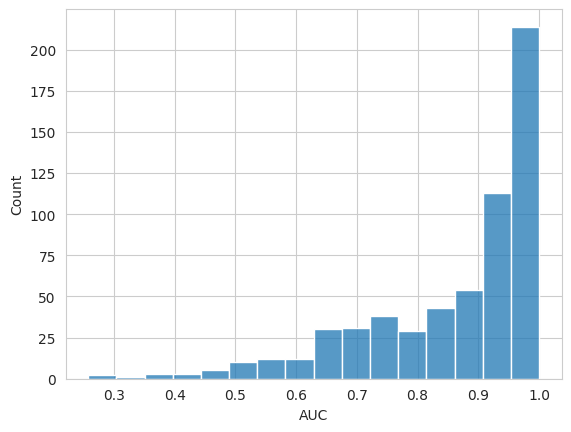

In [97]:
sns.histplot(data=sarcoma_2020, x='AUC')

In [212]:
min_auc = 0.8

sarcoma_2020.loc[sarcoma_2020['AUC'] < min_auc].groupby('cell_line')['drug'].count()

cell_line
A-204       58
MES-SA      31
SK-ES-1     45
SK-LMS-1    33
Name: drug, dtype: int64

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

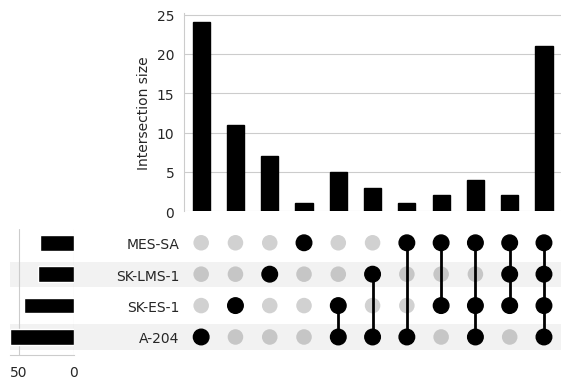

In [142]:
import pandas as pd
from upsetplot import plot

sarcomasets = sarcoma_2020.loc[sarcoma_2020['AUC'] < min_auc].groupby('cell_line')['drug'].apply(set)
set_names = sarcomasets.index.to_list()
set1 = sarcomasets.values[0]
set2 = sarcomasets.values[1]
set3 = sarcomasets.values[2]
set4 = sarcomasets.values[3]
all_elems = set1.union(set2).union(set3).union(set4)
df = pd.DataFrame([[e in set1, e in set2, e in set3, e in set4] for e in all_elems], columns=set_names)
df_up = df.groupby(set_names).size()
plot(df_up, orientation='horizontal')

# Barplot of different effects the proteomics analysis had on the MTBs

In [16]:
file = pd.read_excel(
    '/home/fhamood/Downloads/Kopie von Phosphoproteomics_added value evaluation_Figure5_AS 230428.xlsx')
file = file.drop(index=[0, 1]).reset_index(drop=True)
file

,PID,MTB Date,Bearbeiter,OncoTree,WGS (0_1),RNAseq (0_1),PP(0_1),Targets (all),Alteration type -all (Amp/Del/Indel/SNV/R/P exp++/exp--/phospho++),LOF/GOF,...,Final priority,"Priorisation/Evidencelevel\nchanged by P-Proteomics\n(*x targets) upgrade (+), downgrade (-)",yes/no/na,Target (P-Proteomics),Proteomics value for therapy recommendation (decesive/supporting/not supporting),"Therapy Basket (nach Horak et al, 2021)",Wirkstoff (copy recommendation),Off label /In label/study,molecular evidence level,Unnamed: 24
0,H021-QJF2SL-M2,230127,VT,NaN,1,1,1,TSC2,NaN,LOF,...,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSTR2,//exp++,NaN,...,NaN,no,NaN,NaN,NaN,NaN,RLT,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDH17,//exp++,GOF,...,NaN,NaN,yes,NaN,NaN,NaN,Antibody,NaN,NaN,NaN
3,H021-UVJ1LB-M1/M3,230127,VT,NaN,1,0,1,KRAS,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H021-A8HUB1-M2,230127,VT,NaN,1,1,1,FGFR1,SNV/Exp++//exp nd/pp++,GOF,...,NaN,no,no,NaN,NaN,RTK,Kinase Inhibition,off label/Study,m2c,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,H021-YT3YPX-T1-Q1,230526,PH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,H021-Z9GP1T-M2-Q1,230526,AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,H021-ZEU1UK-U1,tbd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,H021-ZHVK6R-M3-Q1,230517,PH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
full_list = file['Proteomics value for therapy recommendation (decesive/supporting/not supporting)']
totalcounts = full_list.value_counts(dropna=False)
totalcounts

NaN                142
supporting          48
decesive            27
na                  17
not supporting      10
supportive           7
decisive             6
ns                   5
check                5
not suporting        5
decesive             4
not supported        2
decisive             2
 supporting          1
nr                   1
not Supporting       1
not recommended      1
Name: Proteomics value for therapy recommendation (decesive/supporting/not supporting), dtype: int64

In [18]:
not_known = 'na'
decisive = 'decisive'
supporting = 'supporting'
not_supporting = 'not supporting'

agg_dict = {
    'supporting': supporting,
    'decesive': decisive,
    'na': not_known,
    'not supporting': not_supporting,
    'supportive': supporting,
    'decisive': decisive,
    'ns': not_supporting,
    'check': not_known,
    'not suporting': not_supporting,
    'decesive ': decisive,
    'not supported': not_supporting,
    'decisive ': decisive,
    ' supporting': supporting,
    'nr': not_known,
    'not Supporting ': not_supporting,
    'not recommended': not_supporting
}

agg_list = full_list.replace(agg_dict)
agg_list = agg_list.value_counts(dropna=False)
agg_list

NaN               142
supporting         56
decisive           39
not supporting     24
na                 23
Name: Proteomics value for therapy recommendation (decesive/supporting/not supporting), dtype: int64

In [19]:
agg_list.index

Index([nan, 'supporting', 'decisive', 'not supporting', 'na'], dtype='object')

<AxesSubplot: >

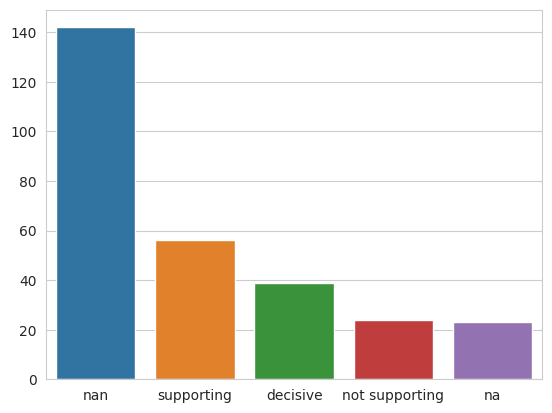

In [20]:
sns.barplot(agg_list, x=agg_list.index.astype(str).to_list(), y=agg_list.values)

In [21]:
file['Proteomics value for therapy recommendation (decesive/supporting/not supporting)'] = file[
    'Proteomics value for therapy recommendation (decesive/supporting/not supporting)'].map(agg_dict)
file

,PID,MTB Date,Bearbeiter,OncoTree,WGS (0_1),RNAseq (0_1),PP(0_1),Targets (all),Alteration type -all (Amp/Del/Indel/SNV/R/P exp++/exp--/phospho++),LOF/GOF,...,Final priority,"Priorisation/Evidencelevel\nchanged by P-Proteomics\n(*x targets) upgrade (+), downgrade (-)",yes/no/na,Target (P-Proteomics),Proteomics value for therapy recommendation (decesive/supporting/not supporting),"Therapy Basket (nach Horak et al, 2021)",Wirkstoff (copy recommendation),Off label /In label/study,molecular evidence level,Unnamed: 24
0,H021-QJF2SL-M2,230127,VT,NaN,1,1,1,TSC2,NaN,LOF,...,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSTR2,//exp++,NaN,...,NaN,no,NaN,NaN,NaN,NaN,RLT,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CDH17,//exp++,GOF,...,NaN,NaN,yes,NaN,NaN,NaN,Antibody,NaN,NaN,NaN
3,H021-UVJ1LB-M1/M3,230127,VT,NaN,1,0,1,KRAS,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H021-A8HUB1-M2,230127,VT,NaN,1,1,1,FGFR1,SNV/Exp++//exp nd/pp++,GOF,...,NaN,no,no,NaN,NaN,RTK,Kinase Inhibition,off label/Study,m2c,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,H021-YT3YPX-T1-Q1,230526,PH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,H021-Z9GP1T-M2-Q1,230526,AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,H021-ZEU1UK-U1,tbd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,H021-ZHVK6R-M3-Q1,230517,PH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
file[['PID', 'MTB Date', 'Bearbeiter', 'OncoTree', 'WGS (0_1)', 'RNAseq (0_1)', 'PP(0_1)']] = file[['PID', 'MTB Date', 'Bearbeiter', 'OncoTree', 'WGS (0_1)', 'RNAseq (0_1)', 'PP(0_1)']].fillna(method='ffill')
file

,PID,MTB Date,Bearbeiter,OncoTree,WGS (0_1),RNAseq (0_1),PP(0_1),Targets (all),Alteration type -all (Amp/Del/Indel/SNV/R/P exp++/exp--/phospho++),LOF/GOF,...,Final priority,"Priorisation/Evidencelevel\nchanged by P-Proteomics\n(*x targets) upgrade (+), downgrade (-)",yes/no/na,Target (P-Proteomics),Proteomics value for therapy recommendation (decesive/supporting/not supporting),"Therapy Basket (nach Horak et al, 2021)",Wirkstoff (copy recommendation),Off label /In label/study,molecular evidence level,Unnamed: 24
0,H021-QJF2SL-M2,230127,VT,NaN,1,1,1,TSC2,NaN,LOF,...,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H021-QJF2SL-M2,230127,VT,NaN,1,1,1,SSTR2,//exp++,NaN,...,NaN,no,NaN,NaN,NaN,NaN,RLT,NaN,NaN,NaN
2,H021-QJF2SL-M2,230127,VT,NaN,1,1,1,CDH17,//exp++,GOF,...,NaN,NaN,yes,NaN,NaN,NaN,Antibody,NaN,NaN,NaN
3,H021-UVJ1LB-M1/M3,230127,VT,NaN,1,0,1,KRAS,NaN,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H021-A8HUB1-M2,230127,VT,NaN,1,1,1,FGFR1,SNV/Exp++//exp nd/pp++,GOF,...,NaN,no,no,NaN,NaN,RTK,Kinase Inhibition,off label/Study,m2c,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,H021-YT3YPX-T1-Q1,230526,PH,NaN,1,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,H021-Z9GP1T-M2-Q1,230526,AM,NaN,1,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,H021-ZEU1UK-U1,tbd,AM,NaN,1,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,H021-ZHVK6R-M3-Q1,230517,PH,NaN,1,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
file = file.rename(columns={'Proteomics value for therapy recommendation (decesive/supporting/not supporting)': 'prot_val'})

In [61]:
set_analysis = file[['PID', 'prot_val']].groupby('PID')['prot_val'].apply(set).reset_index(name='proteomics_results')
set_analysis['proteomics_results'] = set_analysis['proteomics_results'].apply(lambda x: list(x))
set_analysis

,PID,proteomics_results
0,H021-192LV1-M1,"[decisive, na, supporting]"
1,H021-1CM1EC-T2-Q1,[nan]
2,H021-1GLAY6-T3,[nan]
3,H021-1KK46T-M2/M1,[nan]
4,H021-25ABKZ-M1-Q1,[nan]
...,...,...
166,H021-ZG87AF-M3-Q1,[nan]
167,H021-ZHRCET-M2,"[decisive, supporting, not supporting]"
168,H021-ZHVK6R-M3-Q1,[nan]
169,H021-ZPKDNH-M1-Q1,[nan]


In [60]:
def decide_hierarchical(x: list):
    if 'decisive' in x:
        return 'decisive'
    elif 'supporting' in x:
        return 'supporting'
    elif 'not supporting' in x:
        return 'not supporting'
    else:
        return 'not known'

set_analysis['proteomics_results'] = set_analysis['proteomics_results'].apply(decide_hierarchical)
set_analysis

,PID,proteomics_results
0,H021-192LV1-M1,decisive
1,H021-1CM1EC-T2-Q1,not known
2,H021-1GLAY6-T3,not known
3,H021-1KK46T-M2/M1,not known
4,H021-25ABKZ-M1-Q1,not known
...,...,...
166,H021-ZG87AF-M3-Q1,not known
167,H021-ZHRCET-M2,decisive
168,H021-ZHVK6R-M3-Q1,not known
169,H021-ZPKDNH-M1-Q1,not known


In [54]:
analysis_counts = set_analysis['proteomics_results'].value_counts()
analysis_counts

not known         129
decisive           32
supporting          9
not supporting      1
Name: proteomics_results, dtype: int64

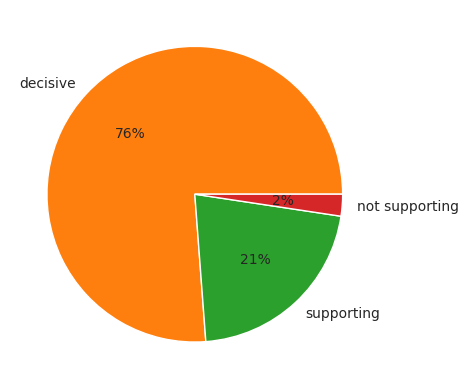

In [58]:
# define Seaborn color palette to use
palette_color = sns.color_palette()

# plotting data on chart
plt.pie(analysis_counts[1:], labels=analysis_counts[1:].index, colors=palette_color[1:], autopct='%.0f%%')

# displaying chart
plt.show()

# Analysis of different peptides generated by highly similar runs in WP3 pipeline

In [2]:
old = pd.read_csv('/home/fhamood/Downloads/TERT_cluster_fp_old.csv')
new = pd.read_csv('/home/fhamood/Downloads/TERT_cluster_fp_new.csv')
old_filtered = old.loc[old['PEP'] < 0.01]
new_filtered = new.loc[new['PEP'] < 0.01]

In [12]:
old_filtered

,Unnamed: 0,summary_ID,Raw file,scanID,clusterID,Retention time,m/z,Mass,Precursor full scan number,MS scan number,...,Mass error [ppm],PEP,Score,Delta score,PIF,Precursor Intensity,Reverse,mod_ambiguous,raw_ambiguous,identification
10,1353785,1353785,5335_A09_061426_S00_U09_TMT11_R1,8398,37906,16.719,788.477801,1574.941050,8393,8393,...,409720,0.003756,116.880,10.7060,0.997326,35186380.0,NaN,NaN,1,d
11,1353786,1353786,6029_E06_085081_S00_U06_TMT11_R1,9352,37906,17.248,788.477956,1574.941359,9350,9350,...,409720,0.009029,79.986,4.7962,0.985998,5616980.5,NaN,NaN,1,d
34,1353809,1353809,5621_A08_065241_S00_U08_TMT11_R1,8508,37906,17.142,788.476012,1574.937471,8507,8507,...,409710,0.003073,124.830,18.7930,0.954950,18404422.0,NaN,NaN,1,d


In [15]:
new_filtered.loc[new_filtered['identification'] == 'd']

,Unnamed: 0,summary_ID,Raw file,scanID,clusterID,Retention time,m/z,Mass,Precursor full scan number,MS scan number,...,Mass error [ppm],PEP,Score,Delta score,PIF,Precursor Intensity,Reverse,mod_ambiguous,raw_ambiguous,identification
42,1354075,1354075,5335_A09_061426_S00_U09_TMT11_R1,8398,37855,16.719,788.477801,1574.941050,8393,8393,...,409720.0,0.003756,116.88,10.706,0.997326,35186380.0,NaN,NaN,1.0,d
86,1354119,1354119,5621_A08_065241_S00_U08_TMT11_R1,8508,37855,17.142,788.476012,1574.937471,8507,8507,...,409710.0,0.003073,124.83,18.793,0.954950,18404422.0,NaN,NaN,1.0,d


# EuPA Poster Scribbles

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
labels = ['MaxQuant', 'Prosit only', 'SIMSI only', 'Prosit and SIMSI']
values = [58, 30, 35, 0]
stacked_values = [7, 3]

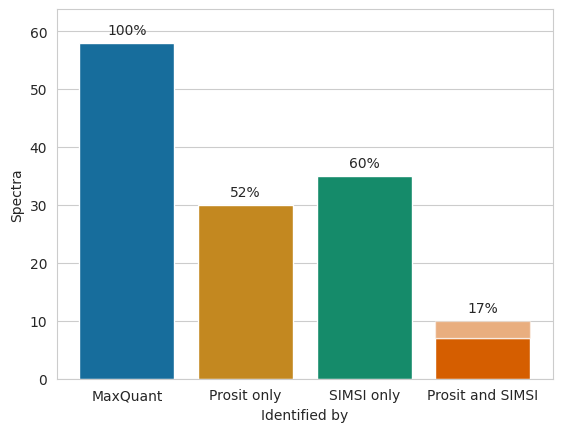

In [123]:
fig, ax = plt.subplots()

barplot = sns.barplot(x=labels, y=values, ax=ax)

# Add the stacked bar
ax.bar(3, stacked_values[0], color=sns.color_palette()[3])
ax.bar(3, stacked_values[1], bottom=stacked_values[0], color=sns.color_palette()[3], alpha=0.5)

for i in values:
    # if i == values[0]:
    #     continue
    if i == 0:
        plt.text(values.index(i), sum(stacked_values) + 1, str(int(round(sum(stacked_values) / values[0], 2) * 100)) + '%', ha='center', va='bottom', fontsize=10, font='DejaVu Sans')
        break
    plt.text(values.index(i), i + 1, str(int(round(i / values[0], 2) * 100)) + '%', ha='center', va='bottom', fontsize=10, font='DejaVu Sans')

ax.set_xlabel('Identified by')
ax.set_ylabel('Spectra')
plt.ylim(0, values[0] * 1.1)

# Display the plot
plt.show()

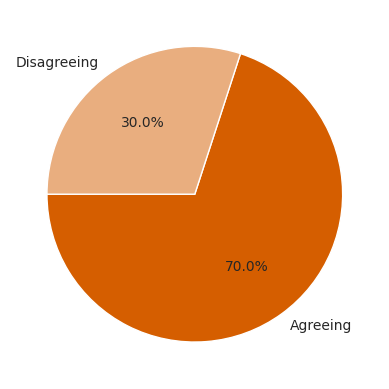

In [107]:
# plotting data on chart
plt.pie(stacked_values, labels=['Agreeing', 'Disagreeing'], colors=[(0.8352941176470589, 0.3686274509803922, 0.0), (0.8352941176470589, 0.3686274509803922, 0.0, 0.5)], autopct='%.1f%%', startangle = 180)

# displaying chart
plt.show()